# Face Recognition Using Principal Component Analysis | Computer Vision

__Description : Recongition of faces using different Eigen faces with Pricipal Component Analysis and evaluation of model performance.__

__Python libraries used :__
    1. Pandas
    2. Numpy
    3. Scikit-learn
    4. Matplotlib
    5. Time

Import pandas and Scikit-learn and other required libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [28]:
import pandas as pd
df = pd.read_csv("face_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


## Analizing the Data


In [41]:
# Determining the shape of our dataset
df.shape

(400, 4097)

In [42]:
type(df)

pandas.core.frame.DataFrame

Let us explore the feature -  __target__

In [43]:
df.target.head(19)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
Name: target, dtype: int64

### Data Cleaning

Let us check if there is any empty or null value in our DataFrame.

In [171]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
4092      0
4093      0
4094      0
4095      0
target    0
Length: 4097, dtype: int64

There is no NULL value to eleminate or fill in with mean values, so lets move forward with Visualizing our data images.

### Visualizing data images and pixels

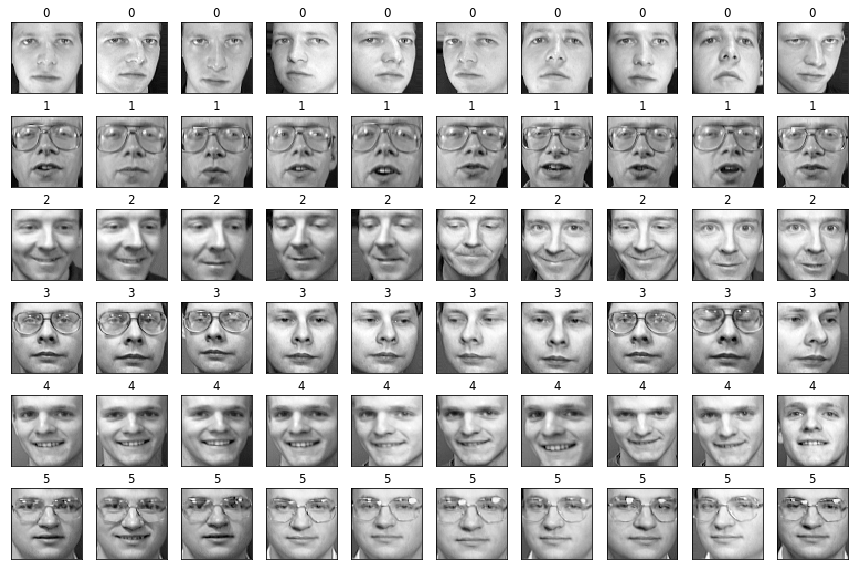

In [224]:
import matplotlib.pyplot as plt
images_pixels = df.drop(["target"],axis=1)
labels = df.target

fig, axes = plt.subplots(6, 10, figsize=(15, 10), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(images_pixels)[i].reshape(64, 64), cmap='gray')  
    ax.set_title(labels[i])
plt.show()

This is a grayscale image with 64 x 64 = 4096 pixels. Each pixel represents a value from 0 to 255 to form an image.

We see the faces with there labels - We have 400 rows which represents 400 faces. Let us represent each face belongs to their target class - First row is from class 0, second row is from class 1 and so on.

Now we can start preparing data to train and test.

## Preparing training and test data with X as features and Y as labels.

We take all columns in X and target column in Y for training

In [153]:
X = df.drop(['target'], axis = 'columns')
X.head()
print(X.iloc[300].shape)
Y = np.array(X.iloc[300]).reshape((1, -1))
print(Y.shape)


(4096,)
(1, 4096)


In [69]:
Y = df.target
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

## Training the Model

__Spliting the features and labels into 80% training and 20% test data.__

In [103]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

Import PCA model from sklearn to perform principal component analysis on x_train and x_test . Play with different values of number of componenets. Fit the model with trainig data

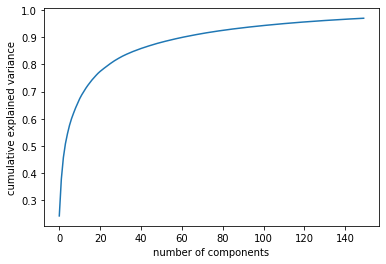

In [203]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=150)
pca_model.fit(x_train)

plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

__Displaying Eigenfaces__

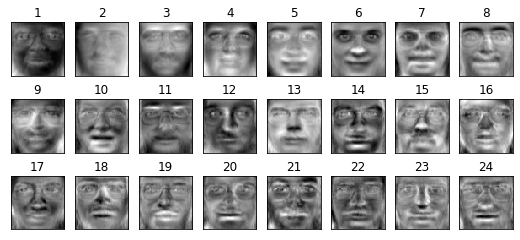

In [227]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(pca_model.components_[i].reshape(64, 64), cmap='gray')
    ax.set_title(str(i+1))
plt.show()

__Projecting the Training data to PCA.__

In [189]:
print('Projecting the input data on the eigenfaces orthonormal basis...')
pca_train = pca_model.transform(x_train)
print('\nProjection task completed!!!')


Projecting the input data on the eigenfaces orthonormal basis...

Projection task completed!!!


__Import All the algorithm from sklearn and play with different values of parameters.__

In [197]:
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
svm_linear = SVC(C = 1, kernel = 'linear')              # Linear Kernel SVM
svm_poly = SVC(C = 1, kernel = 'poly', degree = 2)      # Polynomial Kernel SVM
svm_rbf = SVC(C = 1, kernel = 'rbf', gamma = 0.1)       # Radial Kernel SVM
lr_model = LinearRegression()                           # Linear Regression Model
log_model = LogisticRegression()                        # Logistic Regression Model
DT_model = DecisionTreeRegressor()                      # Decision Tree Model
Knn_model = KNeighborsClassifier()                      # KNN Model

Fit the models with trainig data

In [198]:
svm_linear.fit(pca_train, y_train)
svm_poly.fit(pca_train, y_train)
svm_rbf.fit(pca_train, y_train)
lr_model.fit(pca_train, y_train)
log_model.fit(pca_train, y_train)
DT_model.fit(pca_train, y_train)
Knn_model.fit(pca_train, y_train)

C:\Users\19294\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Making Model Prediction and Computing Accuracy

Compare the score of each SVM Kernel with test data

In [228]:
algorithm = [svm_linear, svm_poly, svm_rbf, lr_model, log_model, DT_model, Knn_model]
model_name = ['Linear SVM', 'Polynomial SVM', 'Radial SVM', 'Linear Regression', 'Logistic Regression', 'Decision Tree', 'K Nearest Neighbors']
pca_test = pca_model.transform(x_test)

scores = []
for i in range(len(model_name)):
    y_pred = algorithm[i].predict(pca_test)
    y_scores = algorithm[i].score(pca_test, y_test)
    scores.append({
            'Model' : model_name[i],
            'Accuracy'  : y_scores
        })


score_df = pd.DataFrame(scores, columns = ['Model', 'Accuracy'])
score_df


,Model,Accuracy
0,Linear SVM,0.987500
1,Polynomial SVM,0.750000
2,Radial SVM,0.462500
3,Linear Regression,0.382524
4,Logistic Regression,0.987500
5,Decision Tree,-0.080585
6,K Nearest Neighbors,0.787500


__After comparison we found that SVM model with Polynomial kernel has highest accuracy = 98.75 %__

## Evaluating the Model

In [220]:
from sklearn.metrics import confusion_matrix, classification_report


### 1. Evaluating Linear Kernel SVM

In [218]:
y_pred_linear = svm_linear.predict(pca_test)
print('Confusion Matrix for Linear Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_linear))
print('\n\n\nClassification Report for Linear Kernel SVM :\n\n', classification_report(y_test,y_pred_linear))

Confusion Matrix for Linear Kernel SVM :

 [[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]



Classification Report for Linear Kernel SVM :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       1.00      

### 2. Evaluating Polynomial Kernel SVM

In [87]:
y_pred_poly = svm_poly.predict(pca_test)
print('Confusion Matrix for Polynomial Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_poly))
print('\n\n\nClassification Report for Polynomial Kernel SVM :\n\n', classification_report(y_test,y_pred_poly))

Confusion Matrix for Polynomial Kernel SVM :

 [[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 1]]



Classification Report for Polynomial Kernel SVM :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         5
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.

C:\Users\19294\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19294\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3. Evaluating Radial Kernel SVM

In [230]:
y_pred_rbf = svm_rbf.predict(pca_test)
print('Confusion Matrix for Radial Kernel SVM :\n\n', confusion_matrix(y_test,y_pred_rbf))
print('\n\n\nClassification Report for Radial Kernel SVM :\n\n', classification_report(y_test,y_pred_rbf))

Confusion Matrix for Radial Kernel SVM :

 [[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 2 0]
 [1 0 0 ... 0 0 1]]



Classification Report for Radial Kernel SVM :

               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         3
           3       1.00      0.50      0.67         2
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         3
           7       1.00      0.33      0.50         3
           8       1.00      0.33      0.50         3
          10       1.00      0.50      0.67         4
          11       0.00      0.00      0.00         4
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         1
          15       1.00      

C:\Users\19294\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\19294\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4. Evaluating Logistic Regression Model

In [232]:
y_pred_log = log_model.predict(pca_test)
print('Confusion Matrix for Logistic Regression Model :\n\n', confusion_matrix(y_test,y_pred_log))
print('\n\n\nClassification Report for Logistic Regression :\n\n', classification_report(y_test,y_pred_log))

Confusion Matrix for Logistic Regression Model :

 [[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]



Classification Report for Logistic Regression :

               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       

## Predicting Random Image class with three SVM models

Define a function to display digit image along with its predicted value

In [159]:
import random

# Function to generate randome index values of specified length
def get_index(start, end, num): 
    index_list = [] 
    for i in range(num): 
        index_list.append(random.randint(start, end))   
    return index_list

# Function to display image and its predicted value
def Predict_Value(model):


    fig, axes = plt.subplots(1, 5, figsize=(10, 2), subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        index = get_index(0, 399, 1)[0]
        pca_X = pca_model.transform(np.array(X.iloc[index]).reshape((1, -1)))
        
        ax.imshow(np.array(X)[index].reshape(64, 64), cmap='gray')  
        ax.set_title(model.predict(pca_X)[0])
    plt.show()



### 1. Linear Kernel SVM

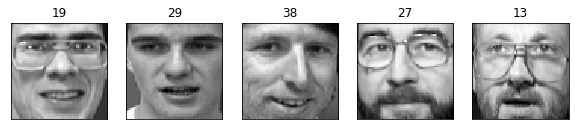

In [158]:
Predict_Value(svm_linear)

### 2. Polynomial Kernel SVM


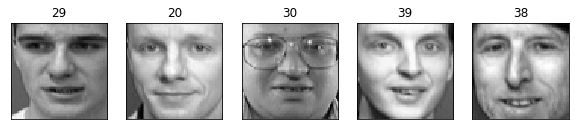

In [160]:
Predict_Value(svm_poly)

### 3. Radial Kernel SVM


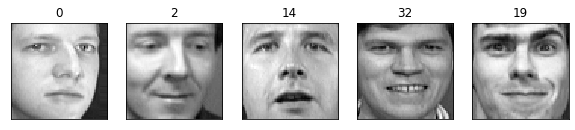

In [161]:
Predict_Value(svm_rbf)

### 4. Logistic Regression Model


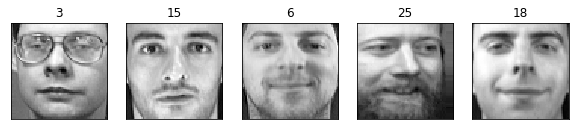

In [233]:
Predict_Value(log_model)

## Result

In [229]:
score_df

,Model,Accuracy
0,Linear SVM,0.987500
1,Polynomial SVM,0.750000
2,Radial SVM,0.462500
3,Linear Regression,0.382524
4,Logistic Regression,0.987500
5,Decision Tree,-0.080585
6,K Nearest Neighbors,0.787500


Face recognition using Eigen Faces is performed with different Machine Learning Algorithm and found __Linear SVM__ and __Logistic Regression__ has highest accuracy of __98.75%__.